# Assignment: Data Visualization and Presentation - AI Fellowship

### Exploring Employee Dataset with Data Visualizations

In this assignment, you will work with a synthetic employee dataset that captures various demographic, educational, and professional attributes such as age, experience, education level, job role, salary, performance scores, and more.

The goal of this assignment is to practice and apply univariate and bivariate data visualization techniques using libraries like Matplotlib and Seaborn. You will create and interpret a variety of plot types to uncover trends, distributions, and relationships within the data.

**Learning Objectives:**

- Understand how to choose the appropriate plot for different types of data

- Gain insights from visual patterns and anomalies

- Practice customization and annotation to make plots more informative

- Interpret visualizations in a real-world context (e.g., HR analytics)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotchecker
from plotchecker import PlotChecker

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Importing Data

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/AayushFuse/data/refs/heads/main/emp_info.csv")
df.head()

,Age,Experience,Salary,Performance_Score,Work_Life_Balance,Department,Education_Level,Gender,Marital_Status,Job_Role
0,38,16,51565,1,4,HR,Bachelor,Female,Married,Manager
1,34,8,68154,2,5,HR,PhD,Female,Single,Clerk
2,39,17,53322,3,3,Engineering,High School,Female,Married,Engineer
3,45,23,56194,4,1,HR,Bachelor,Male,Married,Manager
4,33,10,34832,3,2,HR,Bachelor,Male,Single,Clerk


## Data Descriptions

- **Age**: Age of the employee in years.

- **Experience**: Number of years the employee has worked professionally.

- **Salary**: Annual salary of the employee in USD.

- **Performance_Score**: Employee’s performance rating on a scale from 1 (lowest) to 5 (highest).

- **Work_Life_Balance**: Self-reported rating of work-life balance, from 1 (poor) to 5 (excellent).

- **Department**: The department in which the employee works (e.g., Engineering, HR, Finance).

- **Education_Level**: The highest level of education attained by the employee.

- **Gender**: Gender identity of the employee.

- **Marital_Status**: Current marital status of the employee (e.g., Single, Married).

- **Job_Role**: The job title or role of the employee within the organization.


### BASIC PLOTTING TASKS

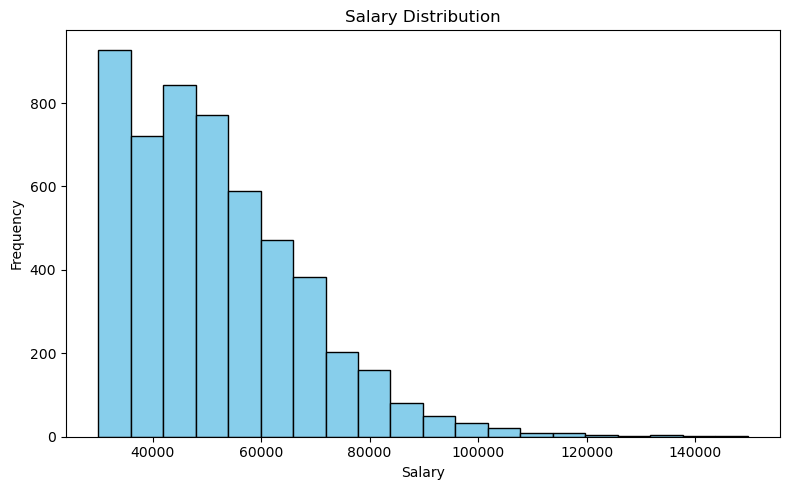

In [52]:
### Ex-1-Task-1
fig, ax = plt.subplots(figsize=(8, 5))
# Plot a histogram to explore the distribution of salaries in the dataset.
# Keep the title of the plot "Salary Distribution"
### BEGIN SOLUTION 
ax.hist(df['Salary'], bins=20, color='skyblue', edgecolor='black')
ax.set_title("Salary Distribution")
ax.set_xlabel("Salary")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()
### END SOLUTION

In [53]:
# INTENTIONALLY LEFT BLANK


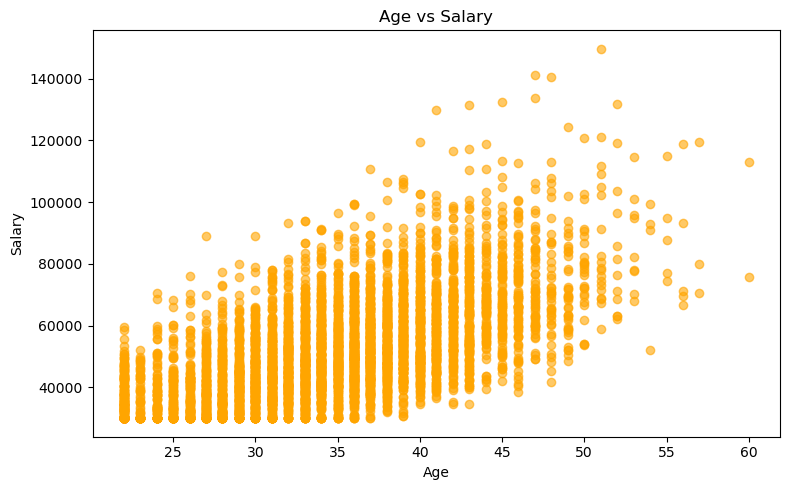

In [54]:
### Ex-1-Task-2
# Create a scatterplot to explore the relationship between Age and Salary.
fig, ax = plt.subplots(figsize=(8, 5))
### BEGIN SOLUTION 
# YOUR CODE HERE
ax.scatter(df['Age'], df['Salary'], color='orange', alpha=0.6)
ax.set_title("Age vs Salary")
ax.set_xlabel("Age")
ax.set_ylabel("Salary")
plt.tight_layout()
plt.show()
### END SOLUTION

In [55]:
# INTENTIONALLY LEFT BLANK


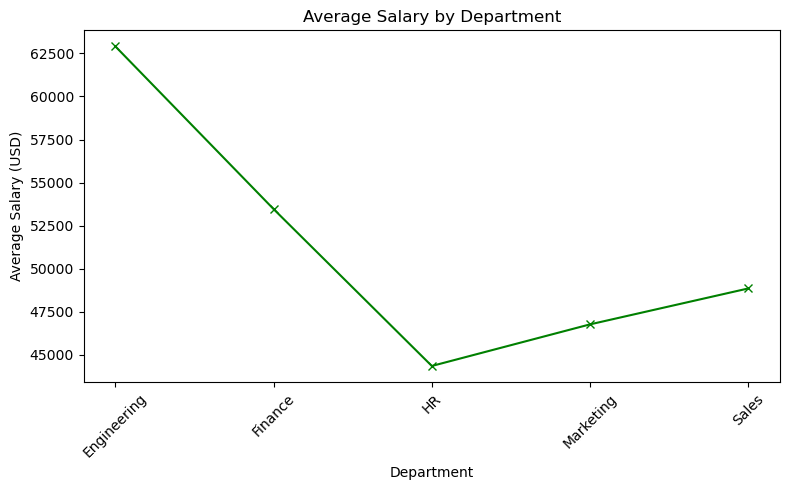

In [56]:
### Ex-1-Task-3
# Plot average salary per department using a line chart.
# Set Title: "Average Salary by Department"
# Use 'x' marker
fig, ax = plt.subplots(figsize=(8, 5))
### BEGIN SOLUTION 
# YOUR CODE HERE
avg_salary = df.groupby('Department')['Salary'].mean().sort_index()
ax.plot(avg_salary.index, avg_salary.values, marker='x', linestyle= '-', color='green')
ax.set_title("Average Salary by Department")
ax.set_xlabel("Department")
ax.set_ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
### END SOLUTION

In [57]:
# INTENTIONALLY LEFT BLANK

### UNIVARIATE ANALYSIS TASKS

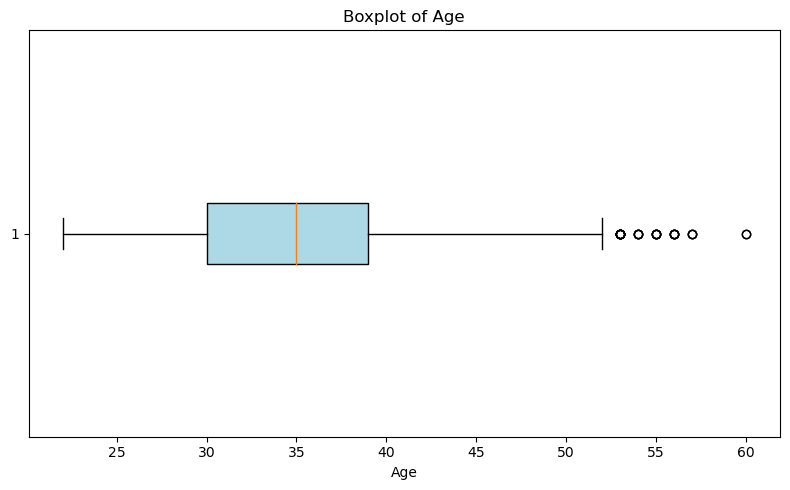

In [58]:
### Ex-2-Task-1
# Create a boxplot to visualize the distribution of Age.
# Set title: Boxplot of Age
fig, ax = plt.subplots(figsize=(8, 5))
### BEGIN SOLUTION 
ax.boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
ax.set(title="Boxplot of Age", xlabel="Age")
plt.tight_layout()
plt.show()
### END SOLUTION

In [59]:
# INTENTIONALLY LEFT BLANK

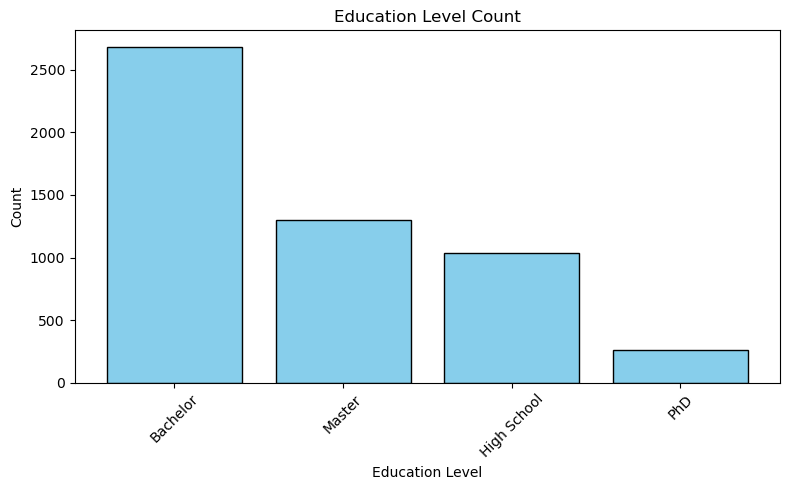

In [60]:
### Ex-2-Task-2
# Plot a bar chart showing the count of each education level.
# Set title: "Education Level Count"
fig, ax = plt.subplots(figsize=(8, 5))
### BEGIN SOLUTION 
education_counts = df['Education_Level'].value_counts()
ax.bar(education_counts.index, education_counts.values, color='skyblue' , edgecolor='black')
ax.set_title("Education Level Count")
ax.set_xlabel("Education Level")    
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### END SOLUTION

In [61]:
# INTENTIONALLY LEFT BLANK

### BIVARIATE ANALYSIS TASKS

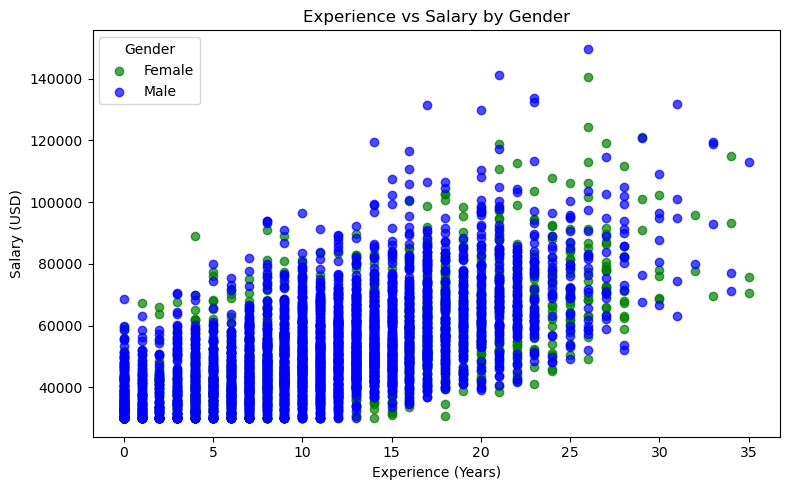

In [62]:
### Ex-3-Task-1
# Create a scatterplot of Experience vs Salary, colored by Gender.
fig, ax = plt.subplots(figsize=(8, 5))
### BEGIN SOLUTION 
colors = {'Male': 'blue','Female': 'green'}
for gender , group in df.groupby('Gender'):
    ax.scatter(group['Experience'], group['Salary'], label= gender, color= colors.get(gender, 'gray'), alpha=0.7)
     
ax.set_title("Experience vs Salary by Gender")
ax.set_xlabel("Experience (Years)")
ax.set_ylabel("Salary (USD)")
ax.legend(title="Gender")
plt.tight_layout()
plt.show()

### END SOLUTION

In [63]:
# INTENTIONALLY LEFT BLANK

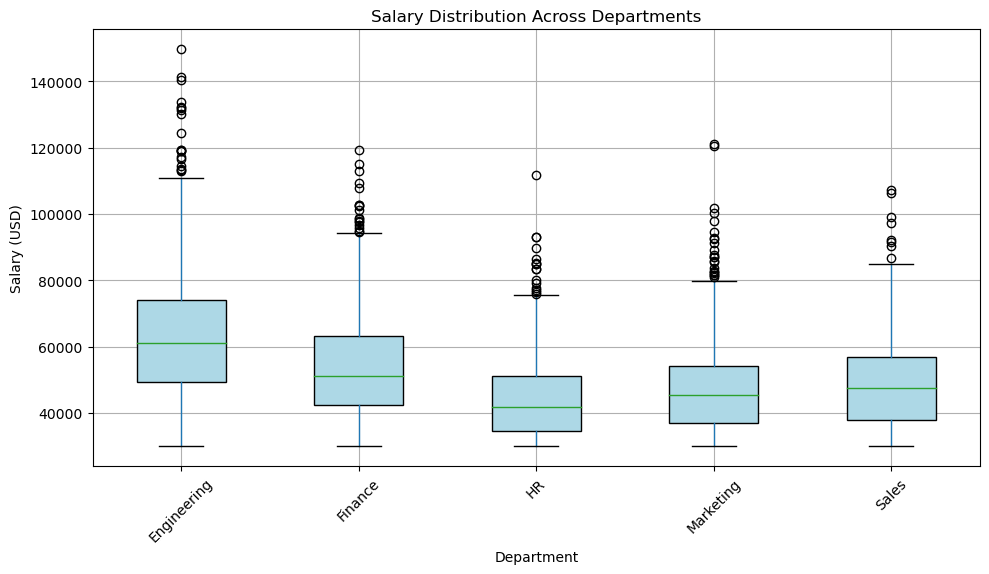

In [64]:
### Ex-3-Task-2
# Create a boxplot showing Salary distribution across Departments.
fig, ax = plt.subplots(figsize=(10, 6))
### BEGIN SOLUTION 
departments = df['Department'].unique()
df.boxplot(column='Salary', by='Department', ax=ax, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.set_title("Salary Distribution Across Departments")
ax.set_xlabel("Department")
ax.set_ylabel("Salary (USD)")
plt.suptitle("")  # Removes the default subtitle added by Pandas
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### END SOLUTION

In [65]:
# INTENTIONALLY LEFT BLANK

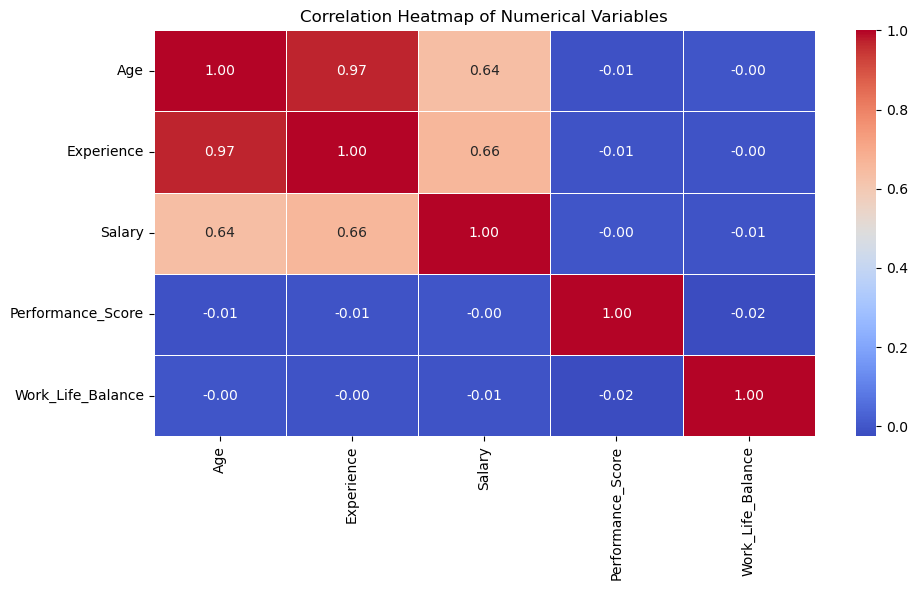

In [66]:
### Ex-3-Task-3
# Show correlation between numerical variables using a heatmap.
fig, ax = plt.subplots(figsize=(10, 6))
# Use seaborn heatmap
### BEGIN SOLUTION 
coor = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(coor, annot=True, cmap='coolwarm', ax=ax, fmt=".2f", linewidths=0.5)
ax.set_title("Correlation Heatmap of Numerical Variables")  
plt.tight_layout()
plt.show()
### END SOLUTION

In [67]:
# INTENTIONALLY LEFT BLANK

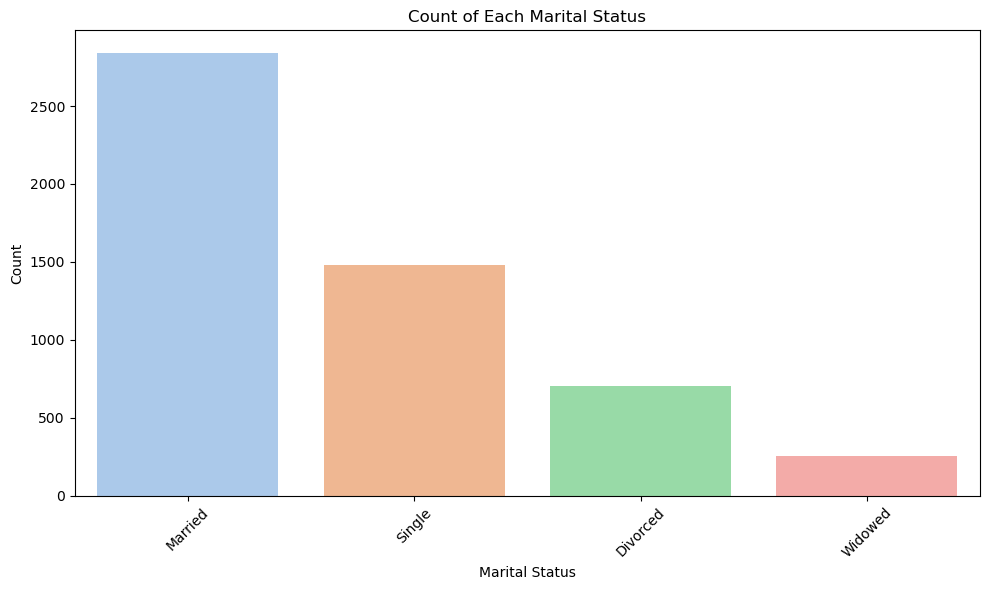

In [68]:
### Ex-4-Task-1
# Use seaborn (declarative) to plot count of each marital status.
fig, ax = plt.subplots(figsize=(10, 6))
### BEGIN SOLUTION 
# YOUR CODE HERE
sns.countplot(data=df, x='Marital_Status', ax=ax, palette='pastel')
ax.set_title("Count of Each Marital Status")
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
### END SOLUTION

In [69]:
# INTENTIONALLY LEFT BLANK